# Import Dependencies

In [ ]:
%matplotlib inline
import numpy as np
import torch

import matplotlib.pyplot as plt

# Coin Flip Example
## Flip sample generation

In [ ]:
np.random.seed(1)   # Fix the random seed

n = 200             # number of samples
criteria = 0.5      # criteria for defining "head". if sampled probability p >= criteria, it is defined as head

num_heads = 0       # to save number of head samples
num_tails = 0       # to save number of tail samples

p_head_record = []  # to record how empirical "prob(x=head)" changes as n increases
p_tail_record = []  # to record how empirical "prob(x=tail)" changes as n increases

for i in range(n):
    p = np.random.rand()    # sample the number from uniform distribution between [0, 1)

    if p >= criteria:
        num_heads += 1      # head for p larger than criteria
    else:
        num_tails += 1      # tail for p smaller than criteria

    p_head = num_heads/(num_heads+num_tails)    # calculate empirical prob(x=head)
    p_tail = num_tails/(num_heads+num_tails)    # calculate empirical prob(x=tail)

    p_head_record.append(p_head)                # record the empirical prob(x=head) for i
    p_tail_record.append(p_tail)                # record the empirical prob(x=tail) for i

## Plot how the empirical probability converges.

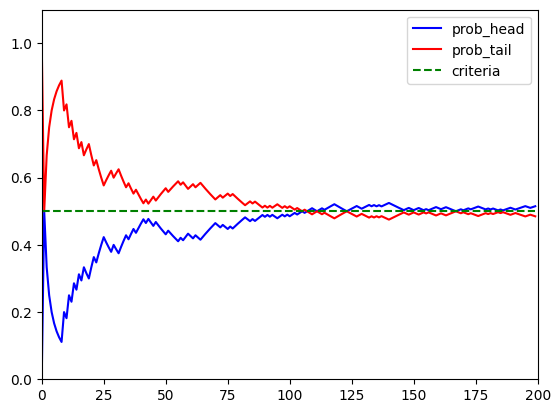

In [ ]:
plt.figure()
plt.plot(np.arange(n), p_head_record, 'b-')
plt.plot(np.arange(n), p_tail_record, 'r-')
plt.plot(np.arange(n), np.ones(n)*criteria, 'g--')
plt.axis([0, n, 0, 1.1])
plt.legend(['prob_head', 'prob_tail', 'criteria'])

# Central Limit Theorem
- Let $X_1,X_2,...$ are i.i.d random variables with finite mean $\mu$ and finite variance $\sigma^2$.
- `n`: number of samples to calculate the sample mean $\bar{X}=\frac{X_1+...X_n}{n}$
- `K`: number of sample means.
    - We will check the distribution of `K` number of $\bar{X}$.
    - The distribution of $\bar{X}$ will converge to the Gaussian Distribution with mean $\mu$ and variance $\sigma^2 / n $.

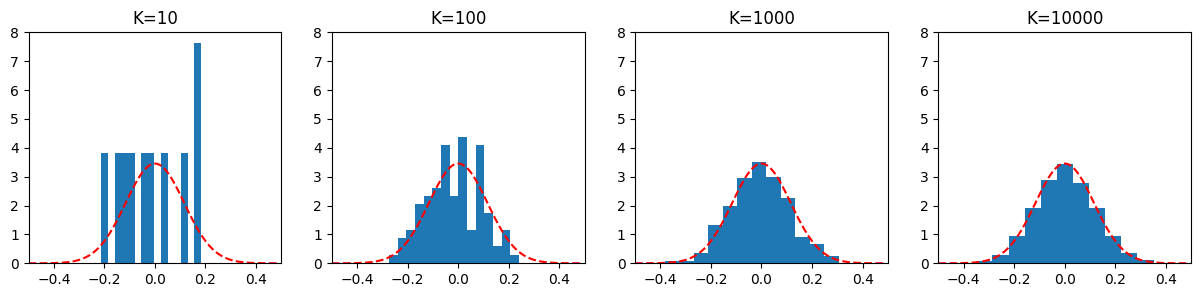

In [ ]:
K = 10**4
n = 25

fig, ax = plt.subplots(1, 4, figsize=(15, 3))       # Code for create subplots (1 row, 4 columns).

total_mean = []                                     # a list to save calculated sample mean values.

b = 15                                              # a parameter controls the number of bins for histogram.

for i in range(K):                                  # we obtain K number of sample means.
    total_x = 0.0                                   # buffer to sum all random variables.
    np.random.seed(i)                               # fix the random seed
    for _ in range(n):
        x = np.random.uniform(low=-1.0, high=1.0)   # generate random variable from uniform distribution

        mu = 0.0                                    # mean of above uniform distribution
        std = np.sqrt((1/3) / n)                    # standard deviation of above uniform distribution
        total_x += x                                # add random variable to the buffer

    mean_x = total_x / n                            # calculate the sample mean
    total_mean.append(mean_x)                       # save the sample mean value to the list.

    if np.log10(i+1) % 1 == 0:                      # if number of samples means becomes 10, 100, 1000, 10000....
        for e in range(4):                          # do the plot!
            if (i+1) == K/(10)**(3-e):
                ax[e].hist(total_mean, bins=b, density=True)
                ax[e].set_title('K={}'.format(i+1))
                ax[e].axis([-0.5, 0.5, 0, 8])

                inp = np.arange(-0.5, 0.5, 0.01)
                norm = (1/np.sqrt(2*np.pi*std**2)) * np.exp(-((inp-mu)**2)/(2*std**2))  # Gaussian distribution to be converged.
                ax[e].plot(inp, norm, 'r--')
